<h1>Aplicacion de Algoritmos de Cluster </h1>

Se tiene un conjunto de datos sobre setas de hongos, en la cual tenemos setas venenosas y comestibles. Se quiere probar con la aplicacion de los algoritmos la diferenciacion entre estas clases.

In [2]:
#Herramientas
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing

#Algoritmos
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN

#Codificacion de variables
from category_encoders import one_hot

#Reduccion de dimensiones
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Metricas
from sklearn.metrics import silhouette_score

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_excel("Libro2.xlsx")
data.head(5)

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.Clase=data.Clase.replace({'p':'venenosa','e':'comestible'})
data.TipoCabeza=data.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data.SuperficieCabeza=data.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data.ColorCabeza=data.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.Moretones=data.Moretones.replace({'t':'si','f':'no'})
data.Fragancia=data.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data.AccesorioBranquial=data.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data.EspacioBranquias=data.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data.TamannoBranquia=data.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data.ColorBranquia=data.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.FormaTallo=data.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data.Volva=data.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data.SuperficieSuperioralAnillo=data.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.SuperficieInferioralAnillo=data.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.ColorTalloSuperioralAnillo=data.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.ColorTalloInferioralAnillo=data.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.TipoVelo=data.TipoVelo.replace({'p':'parcial','u':'universal'})
data.ColorVelo=data.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data.CantidadAnillos=data.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data.TipoAnillo=data.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data.ColorImpresionEsporas=data.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data.Poblacion=data.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data.Habitat=data.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,venenosa,convexa,lisa,marron,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
1,2,comestible,convexa,lisa,amarillo,si,almendra,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,pastos
2,3,comestible,campana,lisa,blanco,si,anis,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,prados
3,4,venenosa,convexa,escamosa,blanco,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
4,5,comestible,convexa,lisa,gris,no,inoloro,libre,abarrotado,ancho,...,liso,blanco,blanco,parcial,blanco,uno,evanecente,marron,abundante,pastos


<AxesSubplot: >

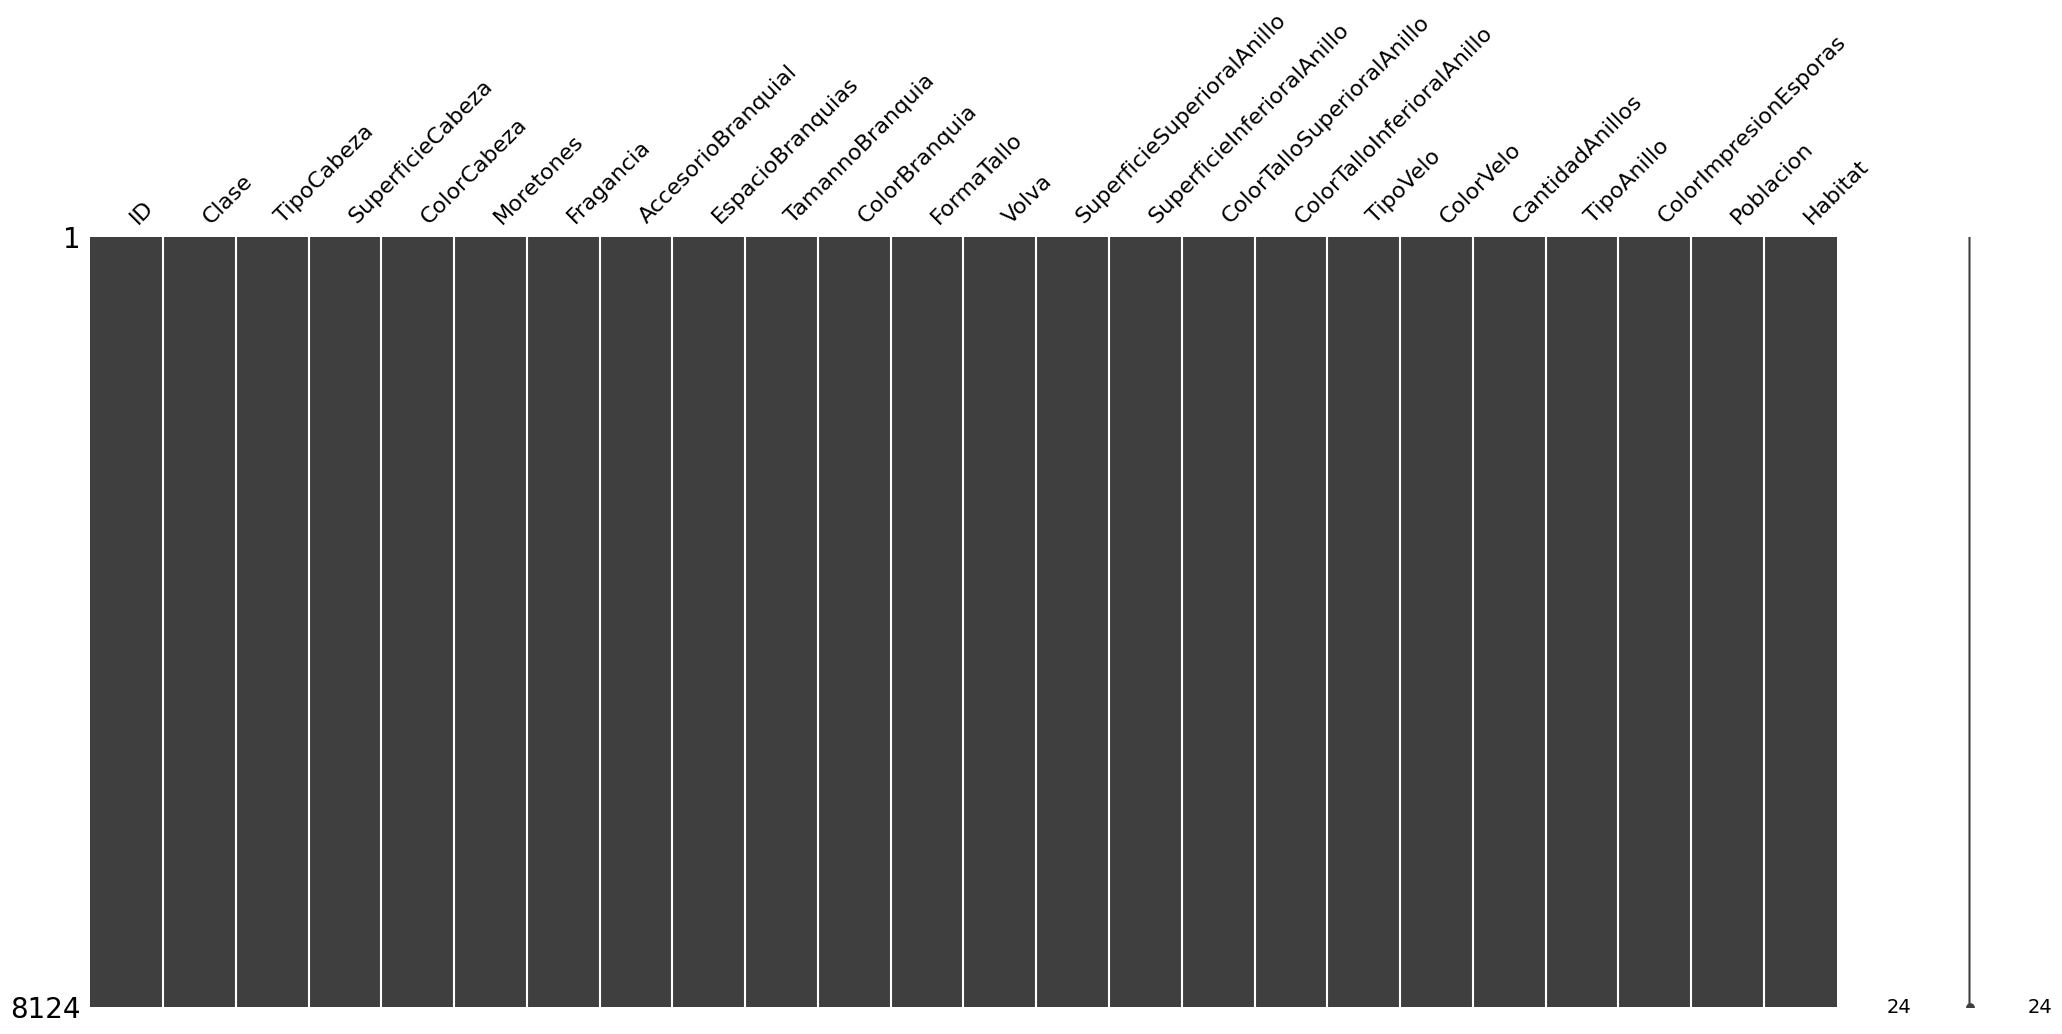

In [6]:
msno.matrix(data)

In [7]:
data.isnull().sum()

ID                            0
Clase                         0
TipoCabeza                    0
SuperficieCabeza              0
ColorCabeza                   0
Moretones                     0
Fragancia                     0
AccesorioBranquial            0
EspacioBranquias              0
TamannoBranquia               0
ColorBranquia                 0
FormaTallo                    0
Volva                         0
SuperficieSuperioralAnillo    0
SuperficieInferioralAnillo    0
ColorTalloSuperioralAnillo    0
ColorTalloInferioralAnillo    0
TipoVelo                      0
ColorVelo                     0
CantidadAnillos               0
TipoAnillo                    0
ColorImpresionEsporas         0
Poblacion                     0
Habitat                       0
dtype: int64

"Clase" es la variable target por la cual se define el tipo de seta

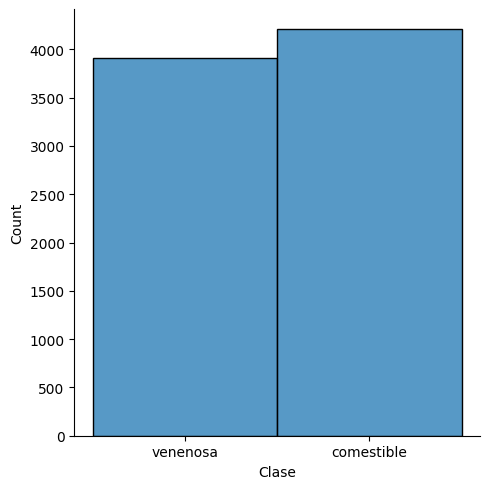

In [51]:
sns.displot(data['Clase'])

Clase no tiene una diferencia notable entre categorias

En cuanto a la variable Volva, se encontro en una analisis previo mas profundo que contaba con una categoria desconocida reemplazada por "?". A continuacion se reemplaza este valor por la Moda de la misma.

In [8]:
Moda=pd.Series(data[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data.Volva=data.Volva.replace({"?": Moda})

Seleccion de Variables a trabajar

In [9]:
Variables_quitar=['ID','AccesorioBranquial','EspacioBranquias','Volva','ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo','CantidadAnillos', 'TipoAnillo','ColorImpresionEsporas']
data=data.drop(labels=Variables_quitar, axis=1)
print(data.columns)

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo', 'ColorVelo',
       'Poblacion', 'Habitat'],
      dtype='object')


<h2>Codificacion de variables categoricas</h2>

Separo las variables con mas categorias para realizar One Hot Encoding, y con las que poseen menos categorias aplicare Label Encoding

In [10]:
p=[data.Clase,data.Moretones,data.FormaTallo,data.TamannoBranquia]
m=[data.TipoCabeza,data.SuperficieCabeza,data.ColorCabeza,data.Fragancia,data.ColorBranquia,data.SuperficieSuperioralAnillo,data.SuperficieInferioralAnillo,data.ColorVelo,data.Poblacion,data.Habitat]
Muchas_categorias=pd.DataFrame(m)
Pocas_categorias=pd.DataFrame(p)
Pocas_categorias=Pocas_categorias.transpose()
Muchas_categorias=Muchas_categorias.transpose()

OHE

In [11]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True) #Inicio el codificador
ce_dummies=ce_ohe.fit_transform(Muchas_categorias) #Lo entreno
ce_dummies.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Poblacion_diversa,Poblacion_solitaria,Poblacion_agrupada,Habitat_urbano,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
ce_dummies=pd.DataFrame(ce_dummies)
data_set_trabajo=pd.concat([ce_dummies,Pocas_categorias], axis=1) #Concateno al dataset orifinal
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,si,agrandando,ancho
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,comestible,si,agrandando,ancho
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,no,disminuyendo,ancho


Label Encoding

In [13]:
le = preprocessing.LabelEncoder()
data_set_trabajo['Clase']=le.fit_transform(data['Clase'])
data_set_trabajo['Moretones']=le.fit_transform(data['Moretones'])
data_set_trabajo['FormaTallo']=le.fit_transform(data['FormaTallo'])
data_set_trabajo['TamannoBranquia']=le.fit_transform(data['TamannoBranquia'])
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Separo mi x e y del conjunto de datos a trabajar

In [14]:
x=data_set_trabajo.drop(['Clase'],axis=1)
y=data_set_trabajo['Clase']

Genero los conjuntos de entrenamiento y testeo

In [15]:
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=3)

Reduccion de Dimensiones

A continuacion se aplicaran dos modelos de reduccion de dimensiones. De 70 variables pasare a tener 2 componentes para luego aplicarles los modelos de agrupacion

In [16]:
# Aplico PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Aplico t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)

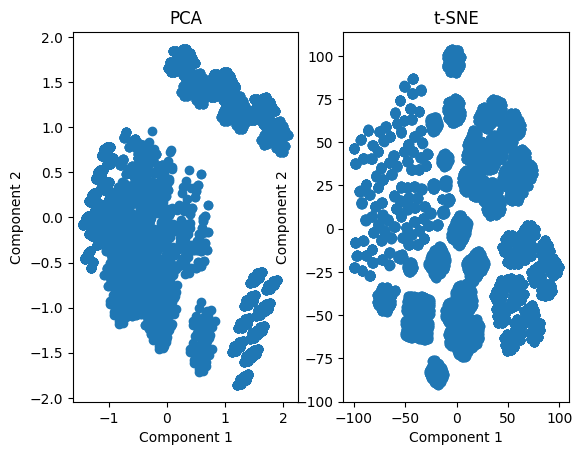

In [45]:
fig, axs = plt.subplots(1, 2)

axs[0].scatter(X_pca[:, 0], X_pca[:, 1])
axs[0].set_title('PCA')


axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1])
axs[1].set_title('t-SNE')

for ax in axs.flat:
    ax.set(xlabel='Componente 1', ylabel='Componente 2')


Con PCA

K-Means

Primero quiero obtener para PCA y para TSNE que cantidad de clusters es conveniente utilizar para K-Means, por lo que utilizo la curva de Elbow e identifico de manera visual el numero de clusters con mejor rendimiento

c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

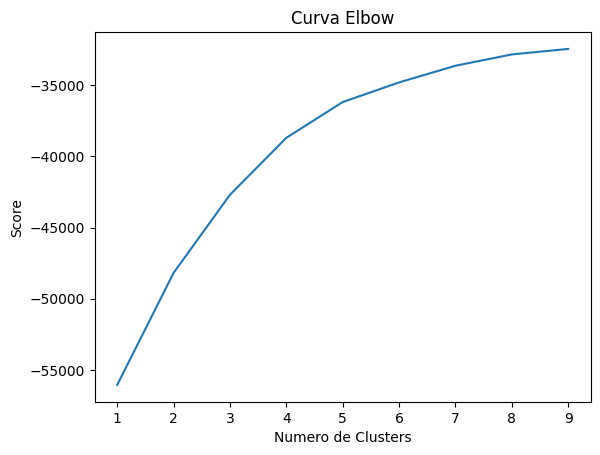

In [18]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Curva Elbow')
plt.show()

Mediante el metodo del codo puedo observar que la cantidad de Clusters apropiada radica en 2

c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


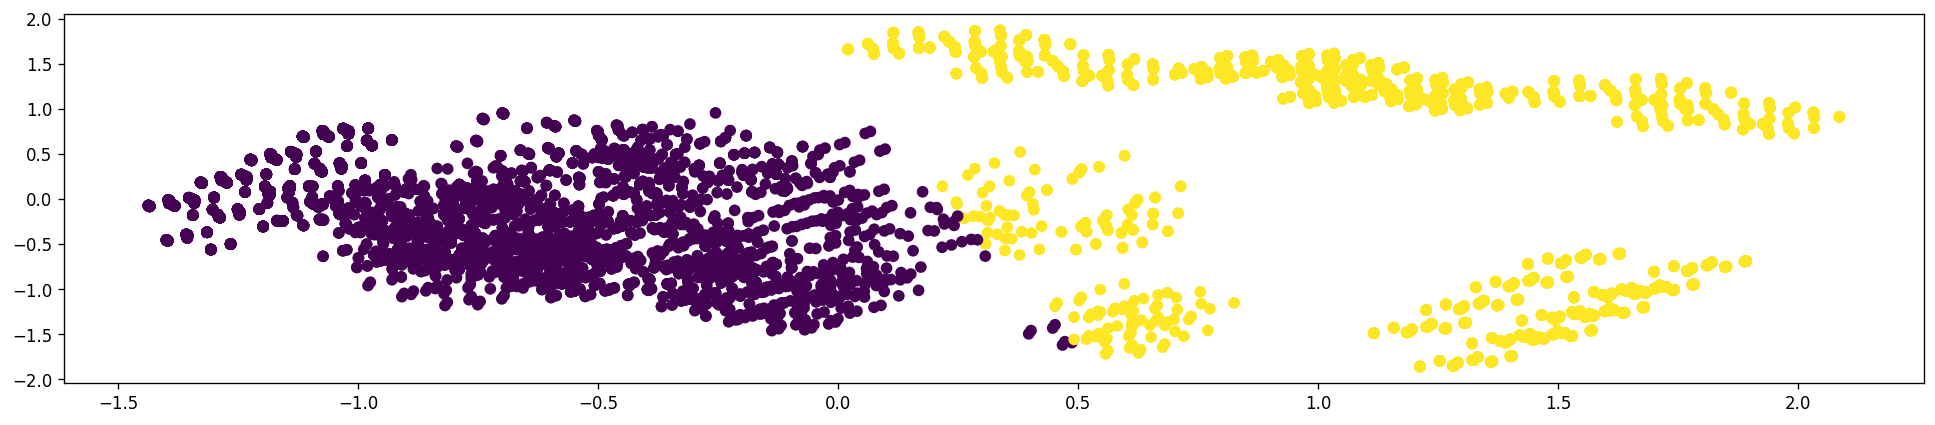

In [40]:
# KMeans clustering

km = KMeans(n_clusters=2, random_state=0)
y_km_pca = km.fit_predict(X_pca)

fig, ax = plt.subplots(figsize=(20, 4), dpi=120)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_km_pca)
plt.show()

DBSCAN

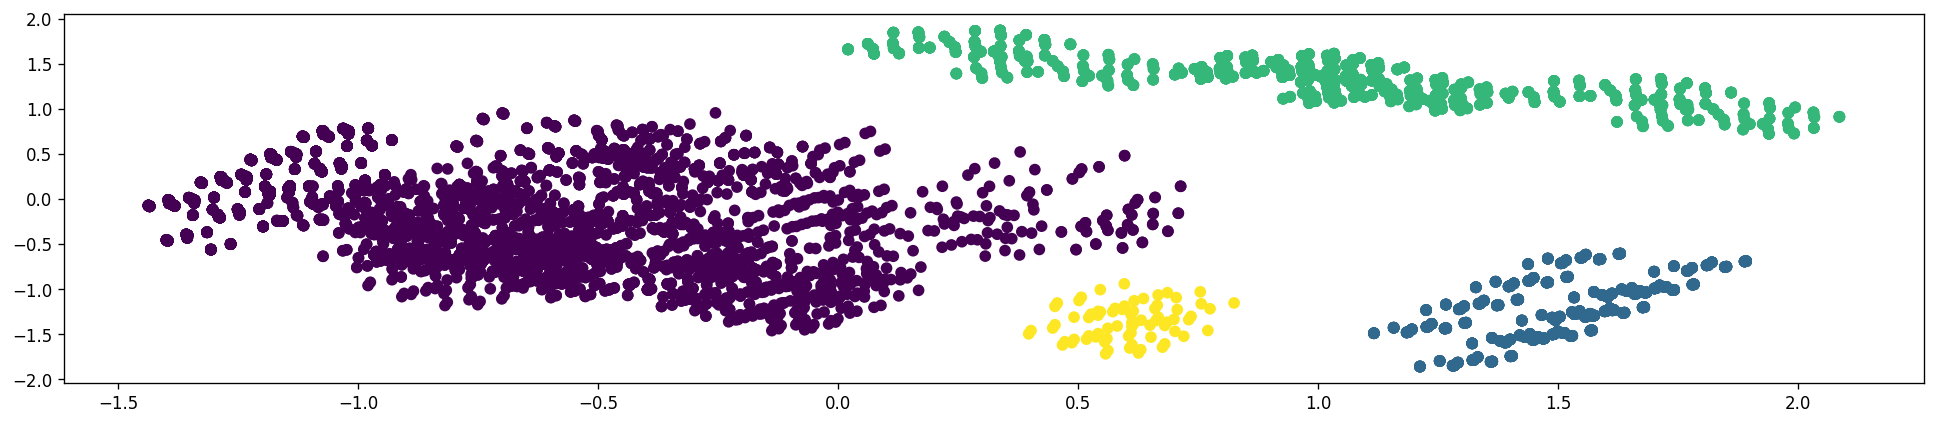

In [39]:
dbscan = DBSCAN(eps=0.3) #Genero el algoritmo
y_dbscan_pca = dbscan.fit_predict(X_pca) #Aplico el algoritmo para las componentes creadas por PCA

fig, ax = plt.subplots(figsize=(20, 4), dpi=120)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan_pca)
plt.show()


Se puede apreciar que DBSCAN obtiene 4 Clusters de mi conjunto de datos

Con T-SNE

K-MEANS

c:\Users\Lauti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


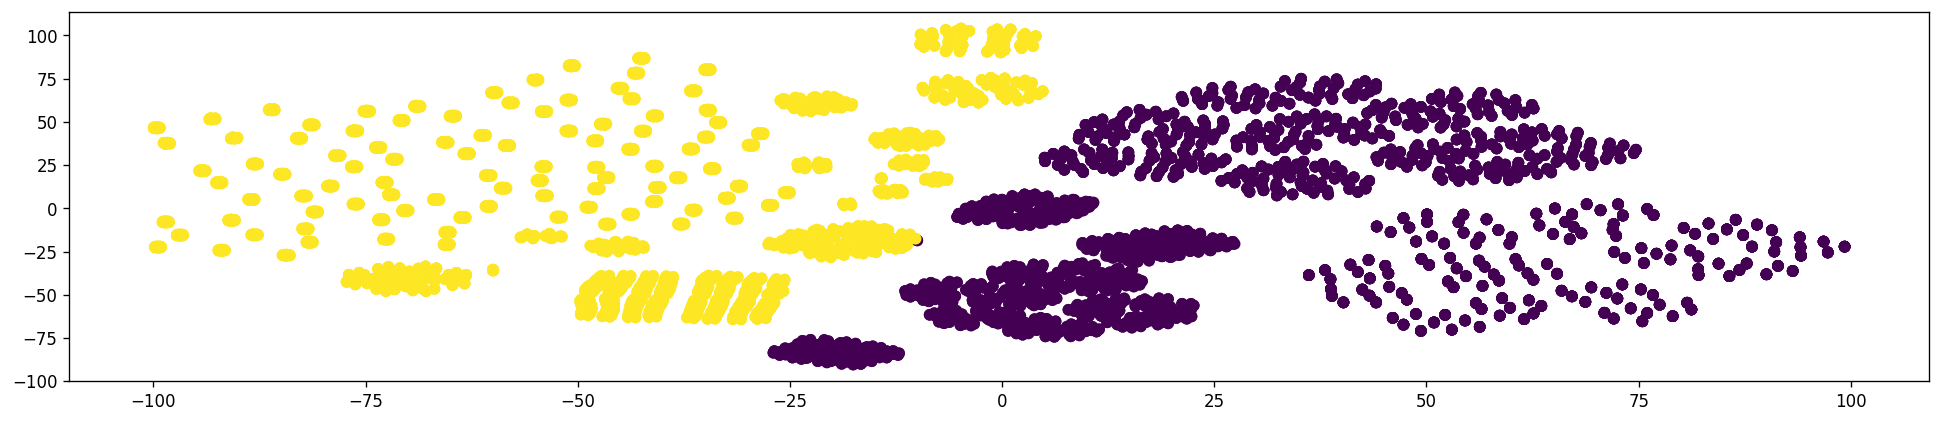

In [41]:
# KMeans clustering

km = KMeans(n_clusters=2, random_state=0)
y_km_tsne = km.fit_predict(X_tsne)

fig, ax = plt.subplots(figsize=(20, 4), dpi=120)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_km_tsne)
plt.show()

DBSCAN

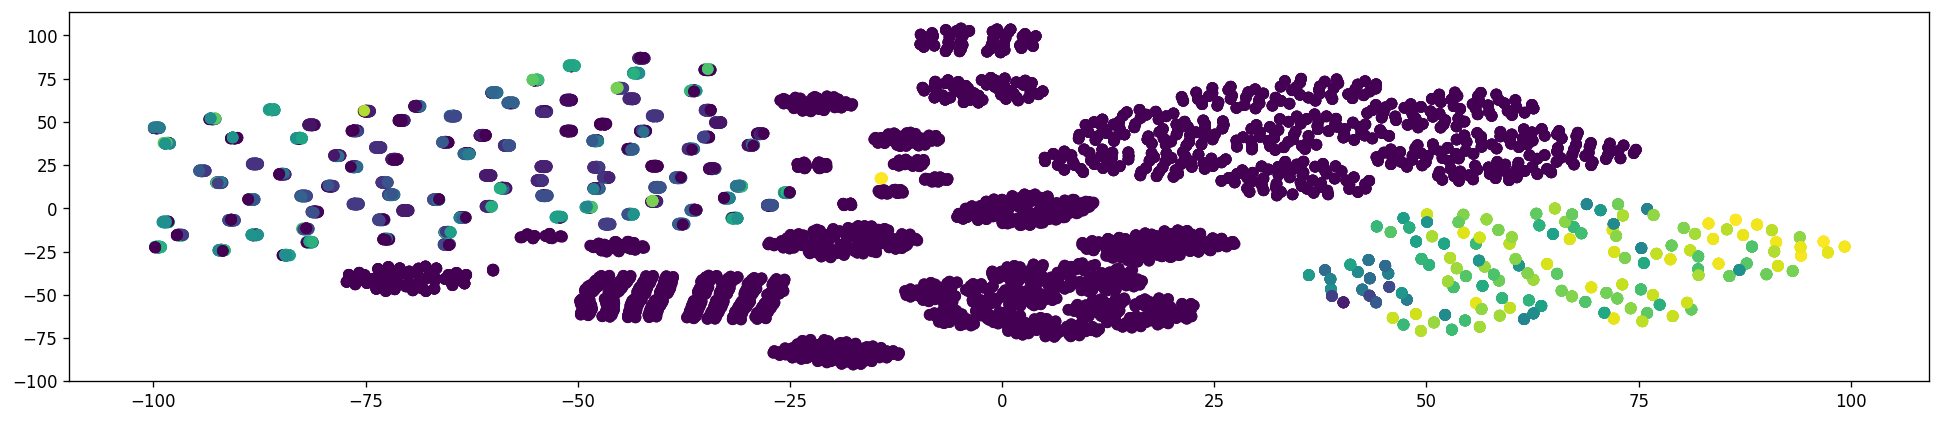

In [42]:
dbscan = DBSCAN(eps=0.3) #Genero el algoritmo
y_dbscan_tsne = dbscan.fit_predict(X_tsne) #Aplico el algoritmo para las componentes creadas por T-SNE

fig, ax = plt.subplots(figsize=(20, 4), dpi=120)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_dbscan_tsne)
plt.show()
